In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import scripts.load_dataset as load_dataset
import scripts.map_and_average as mapper
import scripts.classification as classification
import scripts.outliers as outliers

ERROR! Session/line number was not unique in database. History logging moved to new session 32


/homes/mp305/anaconda/lib/python2.7/site-packages/librosa/core/audio.py:33: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [2]:
OUTPUT_FILES = load_dataset.OUTPUT_FILES
n_iters = 10

In [5]:
df = load_dataset.sample_dataset(csv_file=load_dataset.METADATA_FILE)
df.shape

(8396, 108)

In [48]:
import pandas as pd
import os
pb_df = pd.read_csv(os.path.join('/import/c4dm-04/mariap/FeatureCsvs/PB-melodia/', '49483_SampleAudio.csv'), header=None)
print pb_df.shape
pbihist = np.loadtxt(os.path.join('/import/c4dm-04/mariap/FeatureCsvs/PB-melodia/', '49483_SampleAudio.csv'), delimiter=',')
print pbihist.shape
pb_df.head()

(45, 3600)
(45, 3600)


,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0,0.713115,0.523960,0.704918,0.445776,0.286885,0.426230,0.142497,0.127995,0.301387,...,0.157629,0.194199,0.227617,0.247793,0.297604,0.278058,0.366961,0.404792,0.508197,0
1,0,1.000000,0.495213,0.228458,0.141961,0.210300,0.063387,0.059426,0.138329,0.075272,...,0.132717,0.142621,0.162430,0.195774,0.252228,0.237702,0.297128,0.428854,0.530208,0
2,0,1.000000,0.495213,0.228458,0.141961,0.210300,0.063387,0.059426,0.138329,0.075272,...,0.132717,0.142621,0.162430,0.195774,0.252228,0.237702,0.297128,0.428854,0.530208,0
3,0,1.000000,0.495213,0.228458,0.141961,0.210300,0.063387,0.059426,0.138329,0.075272,...,0.132717,0.142621,0.162430,0.195774,0.252228,0.237702,0.297128,0.428854,0.530208,0
4,0,1.000000,0.495213,0.228458,0.141961,0.210300,0.063387,0.059426,0.138329,0.075272,...,0.131066,0.139320,0.157478,0.192473,0.245626,0.234401,0.288874,0.422252,0.515352,0


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
Name: 0, dtype: float64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
Name: 3599, dtype: float64
0     0.713115
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.725167
6     0.792076
7     0.849182
8     0.848190
9     0.849824
10    0.849824
11    0.860825
12    0.854481
13    0.864482
14    0.858819
15  

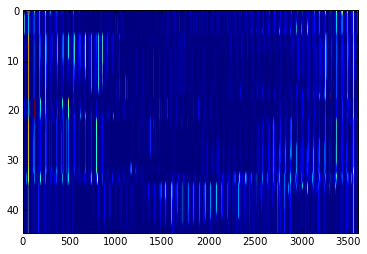

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(pb_df, aspect='auto')
print pb_df.iloc[:, 0]
print pb_df.iloc[:, -1]
print pb_df.iloc[:, 1]

In [56]:
np.argmax(pb_df.get_values(), axis=1)

array([ 59,   1,   1,   1,   1, 733, 733, 733, 733, 733, 733, 733, 733,
       733, 733,  60,  60,  60, 123, 123, 123, 182,  60,   1,   1,   1,
         1,   1,   1,   1,   1,   1,  60, 792, 792,  59,  59,  59,  59,
        59,  59,  59,  59,  59,  59])

In [8]:
df.head()

,AlbumTitle,Artist,Artist_Album,BuyLinkTrackDownload,CatalogNumber,CatalogNumber_Album,Collection,ContentType,ContentType_Album,Country,...,Language_iso3,Language_iso1,Region,Latitude,Longitude,Audio,Speech,Melspec,Chroma,Melodia
29182,Music of Afghanistan,Afghan National Orchestra,Various Artists,26138,FW04361_201,FW04361,NaN,Track,Album,Afghanistan,...,NaN,NaN,South Asia,33.93911,67.709953,/import/c4dm-scratch/matthiasm/data/smithsonia...,/import/c4dm-02/people/mariap/SpeechMusic/2613...,/import/c4dm-02/people/mariap/MelSpec/26138_Sa...,/import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...,/import/c4dm-02/people/mariap/Melodia/26138_Sa...
29183,Music of Afghanistan,Yaqub Kasimi,Various Artists,26142,FW04361_205,FW04361,NaN,Track,Album,Afghanistan,...,NaN,NaN,South Asia,33.93911,67.709953,/import/c4dm-scratch/matthiasm/data/smithsonia...,/import/c4dm-02/people/mariap/SpeechMusic/2614...,/import/c4dm-02/people/mariap/MelSpec/26142_Sa...,/import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...,/import/c4dm-02/people/mariap/Melodia/26142_Sa...
29184,Ustad Mohammad Omar: Virtuoso from Afghanistan,Ustad Mohammad Omar|Zakir Hussain,Ustad Mohammad Omar,51931,SFW40439_102,SFW40439,NaN,Track,Album,Afghanistan,...,pbt,Indo-European,South Asia,33.93911,67.709953,/import/c4dm-scratch/matthiasm/data/smithsonia...,/import/c4dm-02/people/mariap/SpeechMusic/5193...,/import/c4dm-02/people/mariap/MelSpec/51931_Sa...,/import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...,/import/c4dm-02/people/mariap/Melodia/51931_Sa...
29185,Music of Central Asia Vol. 3: Homayun Sakhi: T...,Homayun Sakhi,Homayun Sakhi,53229,SFW40522_101,SFW40522,NaN,Track,Album,Afghanistan,...,NaN,NaN,South Asia,33.93911,67.709953,/import/c4dm-scratch/matthiasm/data/smithsonia...,/import/c4dm-02/people/mariap/SpeechMusic/5322...,/import/c4dm-02/people/mariap/MelSpec/53229_Sa...,/import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...,/import/c4dm-02/people/mariap/Melodia/53229_Sa...
29186,Music of Afghanistan,Rebab and Dhol Duet,Various Artists,26140,FW04361_203,FW04361,NaN,Track,Album,Afghanistan,...,NaN,NaN,South Asia,33.93911,67.709953,/import/c4dm-scratch/matthiasm/data/smithsonia...,/import/c4dm-02/people/mariap/SpeechMusic/2614...,/import/c4dm-02/people/mariap/MelSpec/26140_Sa...,/import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...,/import/c4dm-02/people/mariap/Melodia/26140_Sa...


## test on a few samples

In [47]:
train, val, test = load_dataset.features_for_train_test_sets(df.iloc[:10, :], write_output=False)

file 0 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 1 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 2 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 3 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 4 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB

## now run for the whole dataset

In [59]:
for n in range(n_iters):
    print "iteration %d" % n
    load_dataset.OUTPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    load_dataset.features_for_train_test_sets(df, write_output=True)

iteration 0
file 0 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 1 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 2 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 3 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 4 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pi

ValueError: No columns to parse from file

## Map frames and write output for the lda transformed frames

In [ ]:
MAPPER_OUTPUT_FILES = mapper.OUTPUT_FILES
for n in range(n_iters):
    print "iteration %d" % n
    
    print "mapping..."
    mapper.INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    mapper.OUTPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in MAPPER_OUTPUT_FILES]
    _, _, ldadata_list, _, _, Y, Yaudio = mapper.lda_map_and_average_frames(min_variance=0.99)
    mapper.write_output([], [], ldadata_list, [], [], Y, Yaudio)

## Classification only - assuming mapper files are exported 

In [21]:
n_iters = 10
OUTPUT_FILES = load_dataset.OUTPUT_FILES
MAPPER_OUTPUT_FILES = mapper.OUTPUT_FILES
for n in range(n_iters):
    print "iteration %d" % n
    CLASS_INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in MAPPER_OUTPUT_FILES]
    mapper.INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    X, Y, Yaudio = classification.load_data_from_pickle(CLASS_INPUT_FILES[0])
    #X = np.concatenate(ldadata_list, axis=1)
    # classification and confusion
    if 1:
        print "classifying..."
        traininds, testinds = classification.get_train_test_indices(Yaudio)
        X_train, Y_train, X_test, Y_test = classification.get_train_test_sets(X, Y, traininds, testinds)
        accuracy, _ = classification.confusion_matrix(X_train, Y_train, X_test, Y_test, saveCF=False, plots=False)
        print accuracy

    # outliers
    print "detecting outliers..."
    #ddf = outliers.load_metadata(Yaudio, metadata_file=load_dataset.METADATA_FILE)
    df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_global, N=10)
    
    # write output
    print "writing file"
    df_global.to_csv('../data/outliers_'+str(n)+'.csv', index=False)

iteration 0
classifying...
/import/c4dm-04/mariap/train_data_melodia_8_0.pickle
0.17294625462
detecting outliers...
most outliers 
            Country  Outliers  N_Country  N_Outliers
136        Botswana  0.590909         88          52
31      Ivory Coast  0.571429         14           8
86           Gambia  0.541667         48          26
42            Benin  0.538462         26          14
102            Fiji  0.466667         15           7
20         Pakistan  0.461538         91          42
64           Uganda  0.437500         80          35
14          Liberia  0.425000         40          17
78      El Salvador  0.424242         33          14
50   Western Sahara  0.421687         83          35
least outliers 
            Country  Outliers  N_Country  N_Outliers
1         Lithuania  0.000000         47           0
30      Afghanistan  0.000000         24           0
28       Tajikistan  0.000000         19           0
27      South Korea  0.000000         11           0
113  

Let's sample only 80% of the recordings each time so outlier results are different. Otherwise if we are only including the same 10 recordings from Chad we have more chances of getting the same outliers from Chad.

In [52]:
from sklearn.model_selection import train_test_split

n_iters = 10
OUTPUT_FILES = load_dataset.OUTPUT_FILES
MAPPER_OUTPUT_FILES = mapper.OUTPUT_FILES
for n in range(n_iters):
    print "iteration %d" % n
    CLASS_INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in MAPPER_OUTPUT_FILES]
    mapper.INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    X, Y, Yaudio = classification.load_data_from_pickle(CLASS_INPUT_FILES[0])
    # get only 80% of the dataset.. to vary the choice of outliers
    X, _, Y, _ = train_test_split(X, Y, train_size=0.8, stratify=Y)
    print X.shape, Y.shape
    # outliers
    print "detecting outliers..."
    #ddf = outliers.load_metadata(Yaudio, metadata_file=load_dataset.METADATA_FILE)
    df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_global, N=10)
    
    # write output
    print "writing file"
    df_global.to_csv('../data/outliers_'+str(n)+'.csv', index=False)

iteration 0
(8089, 381) (8089,)
detecting outliers...
most outliers 
            Country  Outliers  N_Country  N_Outliers
136        Botswana  0.590909         88          52
31      Ivory Coast  0.571429         14           8
86           Gambia  0.541667         48          26
42            Benin  0.538462         26          14
102            Fiji  0.466667         15           7
20         Pakistan  0.461538         91          42
64           Uganda  0.437500         80          35
14          Liberia  0.425000         40          17
78      El Salvador  0.424242         33          14
50   Western Sahara  0.421687         83          35
least outliers 
            Country  Outliers  N_Country  N_Outliers
1         Lithuania  0.000000         47           0
30      Afghanistan  0.000000         24           0
28       Tajikistan  0.000000         19           0
27      South Korea  0.000000         11           0
113         Iceland  0.000000         14           0
119         De

Let's try without changing the LDA mapping, so just load the original dataset and get outlier countries by selecting 80% of the recordigns (in stratified manner).'

In [67]:
from sklearn.model_selection import train_test_split

n_iters = 10
for n in range(n_iters):
    print "iteration %d" % n
    results_file = mapper.OUTPUT_FILES[0]
    print results_file
    X, Y, Yaudio = classification.load_data_from_pickle(results_file)
    # get only 80% of the dataset.. to vary the choice of outliers
    X, _, Y, _ = train_test_split(X, Y, train_size=0.8, stratify=Y)
    print X.shape, Y.shape
    # outliers
    print "detecting outliers..."
    #ddf = outliers.load_metadata(Yaudio, metadata_file=load_dataset.METADATA_FILE)
    df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_global, N=10)
    
    # write output
    print "writing file"
    df_global.to_csv('../data/outliers_'+str(n)+'.csv', index=False)

iteration 0
/import/c4dm-04/mariap/lda_data_melodia_8.pickle
(6560, 380) (6560,)
detecting outliers...
most outliers 
           Country  Outliers  N_Country  N_Outliers
95            Chad  0.555556          9           5
86          Gambia  0.525000         40          21
135  French Guiana  0.500000         22          11
44           Benin  0.476190         21          10
15         Liberia  0.468750         32          15
136       Botswana  0.458333         72          33
104         Bhutan  0.444444          9           4
68          Brazil  0.437500         80          35
92     Switzerland  0.428571         42          18
78     El Salvador  0.423077         26          11
least outliers 
                              Country  Outliers  N_Country  N_Outliers
1                           Lithuania  0.000000         38           0
29                         Tajikistan  0.000000         15           0
32                     Czech Republic  0.000000         33           0
107       

## correlation of outlier results

Let's use Kendal correlation to compare the ranked list of countries sorted by most to least outliers.
<br> First load the ranked list of outlier countries.
<br> Sort by outlier percentage in descending order.

In [7]:
ranked_countries = pd.DataFrame()
ranked_outliers = pd.DataFrame()
for n in range(n_iters):
    df_global = pd.read_csv('../data/outliers_'+str(n)+'.csv')
    df_global = df_global.sort_values('Outliers', axis=0, ascending=False).reset_index()
    ranked_countries = pd.concat([ranked_countries, df_global['Country']], axis=1)
    ranked_outliers = pd.concat([ranked_outliers, df_global['Outliers']], axis=1)

In [8]:
ranked_outliers.shape

(137, 10)

Remove countries with 0% outliers as these are in random (probably alphabetical) order.

In [9]:
zero_idx = np.where(np.sum(ranked_outliers, axis=1)==0)[0]
first_zero_idx = np.min(zero_idx)
ranked_countries = ranked_countries.iloc[:first_zero_idx, :]
ranked_outliers = ranked_outliers.iloc[:first_zero_idx, :]
ranked_countries_arr = ranked_countries.get_values()

print ranked_countries.head()
print ranked_outliers.head()

         Country        Country        Country        Country   Country  \
0           Chad           Chad           Chad           Chad  Zimbabwe   
1         Gambia  French Guiana         Bhutan  French Guiana      Chad   
2  French Guiana         Gambia         Gambia         Gambia    Gambia   
3          Benin          Benin  French Guiana        Bolivia     Benin   
4        Liberia        Bolivia    El Salvador       Botswana   Bolivia   

         Country        Country        Country      Country        Country  
0           Chad           Chad           Chad         Chad         Bhutan  
1          Benin  French Guiana         Gambia  El Salvador           Chad  
2         Bhutan       Zimbabwe          Benin        Benin         Gambia  
3  French Guiana         Gambia  French Guiana       Bhutan    El Salvador  
4         Gambia    El Salvador        Senegal       Gambia  French Guiana  
   Outliers  Outliers  Outliers  Outliers  Outliers  Outliers  Outliers  \
0  0.555556 

And now kendalltau correlation

In [71]:
from scipy.stats import kendalltau
r_, p_ = [], []
ranked_countries_arr = ranked_countries.get_values()
for i in range(n_iters-1):
    for j in range(i+1, n_iters):
        r, p = kendalltau(ranked_countries_arr[:, i], ranked_countries_arr[:, j])
        r_.append(r)
        p_.append(p)
r_ = np.array(r_)
p_ = np.array(p_)

In [72]:
print np.mean(r_), np.mean(p_)

0.0493253335359 0.410409379365


In [80]:
from scipy.stats import spearmanr
r, p = spearmanr(ranked_countries_arr)
# only the upper triangular for correlation
upper_idx = np.triu_indices(len(r))
r, p = r[upper_idx], p[upper_idx]
print np.mean(r), np.mean(p)

0.240026302342 0.351418392739


let's focus only on the top K results

In [81]:
k=10
r, p = spearmanr(ranked_countries_arr[:k, :])
# only the upper triangular for correlation
upper_idx = np.triu_indices(len(r))
r, p = r[upper_idx], p[upper_idx]
print np.mean(r), np.mean(p)

0.237245179063 0.417925582965


In [75]:
common_set = set(np.unique(Y))
for i in range(ranked_countries_arr.shape[1]):
    common_set = common_set & set(ranked_countries_arr[:k, i])

In [76]:
common_set

{'Chad', 'French Guiana', 'Gambia'}

## Try precision at K

In [10]:
# majority voting + precision at K (top5?)
from collections import Counter
K_vote = 10
country_vote = Counter(ranked_countries_arr[:K_vote, :].ravel())

In [11]:
df_country_vote = pd.DataFrame.from_dict(country_vote, orient='index').reset_index()
df_country_vote.head()

,index,0
0,Brazil,1
1,Liberia,7
2,Belize,2
3,Chad,10
4,Bhutan,7


In [12]:
df_country_vote.sort_values(0, ascending=False)

,index,0
3,Chad,10
6,Gambia,10
12,French Guiana,10
18,Benin,9
5,El Salvador,9
17,Botswana,8
4,Bhutan,7
1,Liberia,7
16,Bolivia,6
10,Senegal,6


In [14]:
def precision_at_k(array, gr_truth, k):
    return len(set(array[:k]) & set(gr_truth[:k])) / float(k)
    
k = 10
ground_truth = df_country_vote['index'].get_values()
p_ = []
for j in range(ranked_countries_arr.shape[1]):
    p_.append(precision_at_k(ranked_countries_arr[:, j], ground_truth, k))
p_ = np.array(p_)
print np.mean(p_), np.std(p_)

0.51 0.0830662386292


In [15]:
p_

array([ 0.6,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.4,  0.7,  0.4])